# **Projeto Machine Learning: Previsão de Doenças utilizando Machine Learning**

### Bruno Saboya e Esther Dagir

## **Descrição do projeto**

O objetivo deste projeto é desenvolver um modelo de Machine Learning capaz de prever a presença ou ausência de doenças com base em dados clínicos. O projeto utiliza um conjunto de dados disponível no Kaggle, contendo informações sobre pacientes e diversas características relacionadas à saúde.

Aqui vamos importar as bibliotecas necessárias para a realização do Projeto

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation

Em seguida iremos baixar os database

In [233]:
train=pd.read_csv("Training.csv")
test=pd.read_csv("Testing.csv")
train = train.iloc[:,:-1]
train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


# Passo 1 - Análise Exploratória dos dados

Variáveis dependentes existentes do DataSet:

- ```Id```: ID único para cada amostra.
- ```Age```: Idade do paciente.
- ```Gender```: Gênero do paciente.
- ```Air Pollution```: Nível de poluição do ar em uma escala de 1 a 5.
- ```Alcohol use```: Frequência do uso de álcool em uma escala de 1 a 5.
- ```Dust Allergy```: Sensibilidade do paciente a alergias de poeira em uma escala de 0 a 1.
- ```OccuPational Hazards```: Exposição do paciente a riscos ocupacionais em uma escala de 0 a 1.
- ```Genetic Risk```: Risco genético do paciente em uma escala de 0 a 1.
- ```Chronic Lung Disease```: Presença de doença pulmonar crônica no paciente (Sim ou Não).
- ```Balanced Diet```: Indicador se o paciente segue uma dieta equilibrada (Sim ou Não).
- ```Obesity```: Indicador se o paciente está obeso (Sim ou Não).
- ```Smoking```: Indicador se o paciente fuma (Sim ou Não).
- ```Passive Smoker```: Indicador se o paciente é fumante passivo (Sim ou Não).
- ```Chest Pain```: Indicador se o paciente tem dor no peito (Sim ou Não).
- ```Coughing of Blood```: Indicador se o paciente apresenta tosse com sangue (Sim ou Não).
- ```Fatigue```: Indicador se o paciente está fadigado (Sim ou Não).
- ```Weight Loss```: Indicador se o paciente está perdendo peso (Sim ou Não).
- ```Shortness of Breath```: Indicador se o paciente apresenta falta de ar (Sim ou Não).
- ```Wheezing```: Indicador se o paciente apresenta chiado no peito (Sim ou Não).
- ```Swallowing Difficulty```: Indicador se o paciente tem dificuldade para engolir (Sim ou Não).
- ```Clubbing of Finger Nails```: Indicador se o paciente tem clubbing das unhas dos dedos (Sim ou Não).
- ```Frequent Cold```: Indicador se o paciente tem resfriado frequente (Sim ou Não).
- ```Dry Cough```: Indicador se o paciente tem tosse seca (Sim ou Não).
- ```Snoring```: Indicador se o paciente ronca (Sim ou Não).

Variável que desejamos encontrar (independente):

- ```prognosis```: Variável que indica presença ou não da doença

In [234]:
# Examinar as primeiras linhas do conjunto de dados
print(train.head(5))

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [235]:
# Verificar as estatísticas básicas dos dados
print(train.describe())

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

In [236]:
# Verificamos a quantidade de doenças presente no DataSet
train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Analisando essa saída, podemos ver que existem 41 doenças no nosso dataset.

### Pré-processamento

Na etapa de pré-processamento é necessário identificar se há valores nulos no data-set, assim como possíveis outliers que possam atrapalhar a etapa de Processamento e cálculo dos modelos e treinamento dos mesmos.

In [237]:
# Verificar a contagem de valores nulos em cada coluna
print(train.isnull().sum())

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


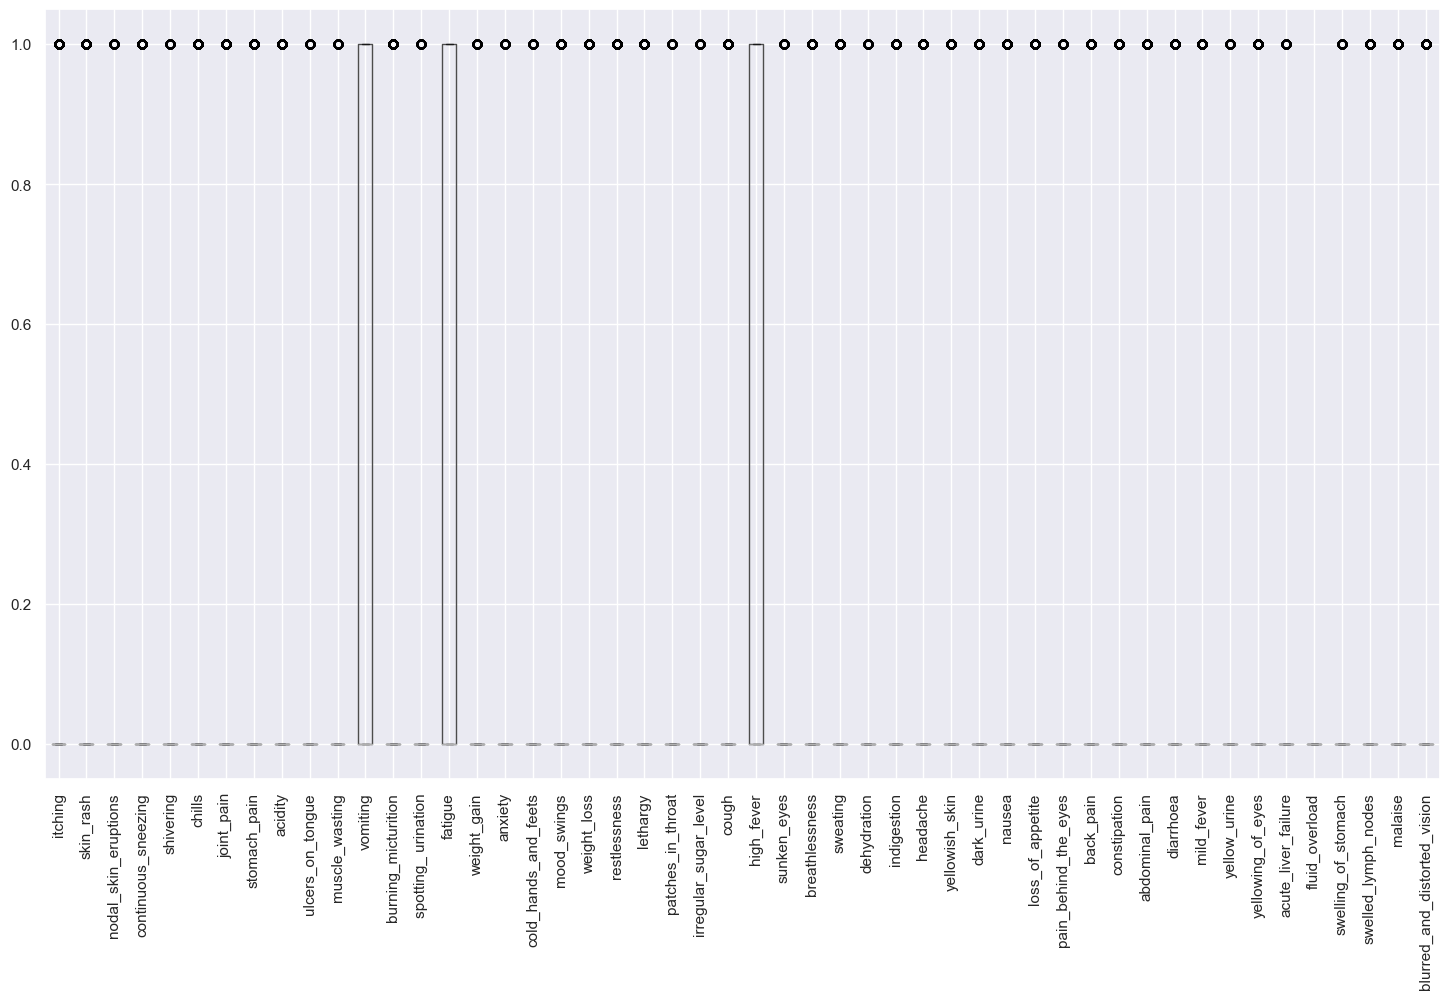

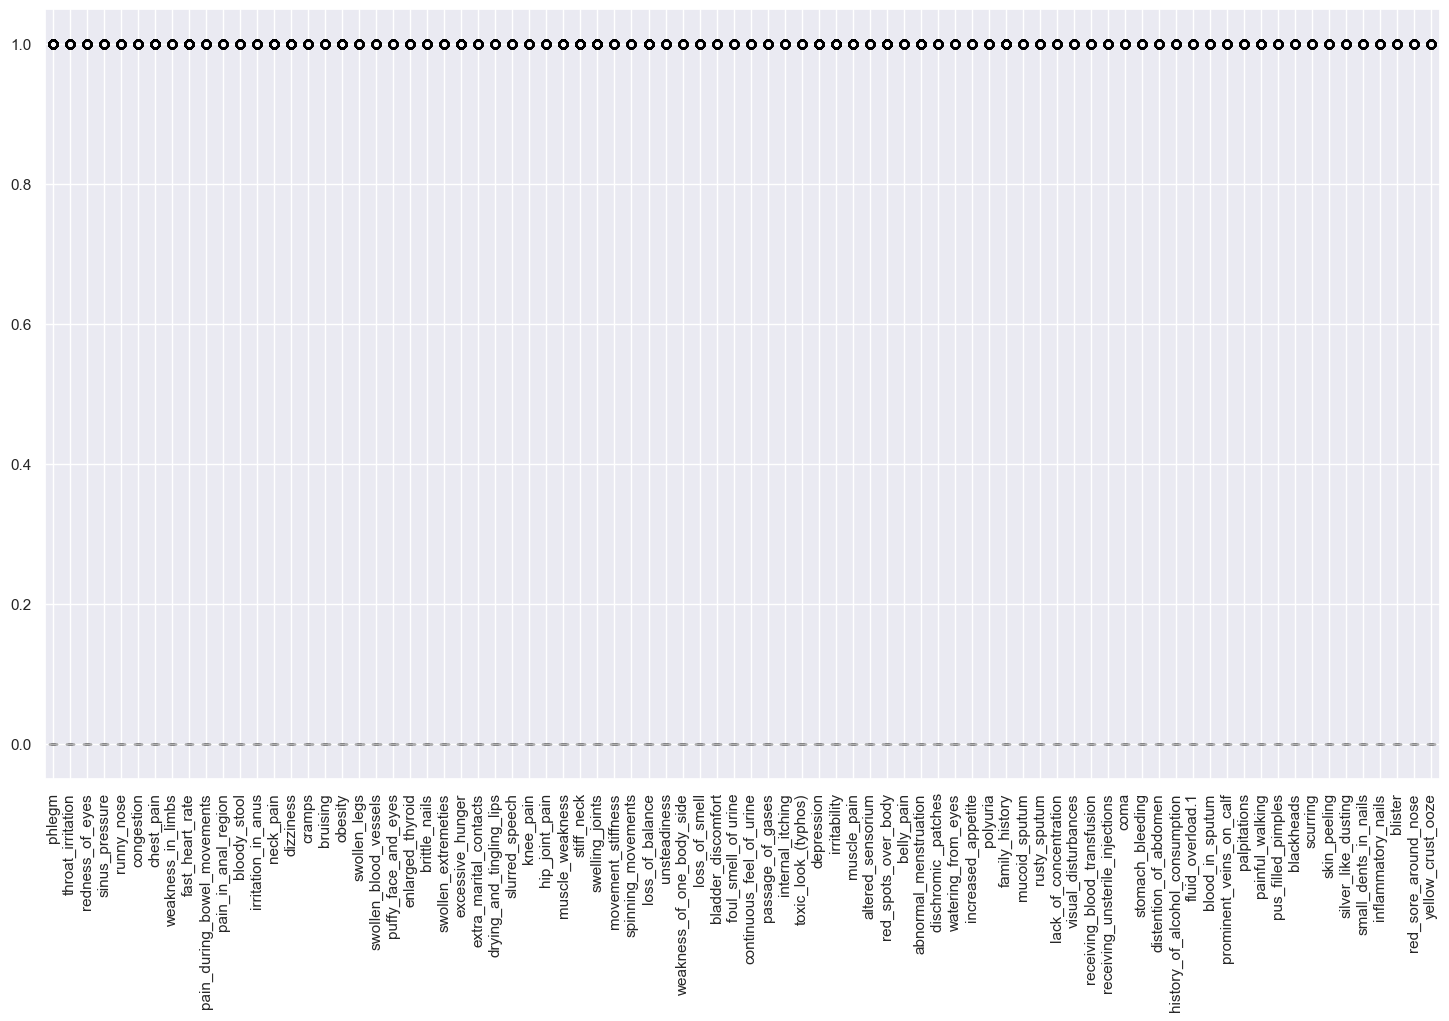

**Summary**:
 No outliers


In [238]:
temp_df=train.iloc[:,:-1]
#Detect outliers
plt.subplots(figsize=(18,10))
temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(18,10))
temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)
plt.show()

print(f'**Summary**:\n No outliers')

Como podemos verificar que não há outliers em nosso Dataset, podemos dar sequência ao projeto

Como temos um uma quantidade de dados muito grande e com uma quantidade de variáveis extensa, é preciso identificar quais variaveis se correlacionam e quais delas fazem sentido serem observadas.

Para isso será necessário montar uma matriz de correlação e em seguida selecionar as relações mais fortes e então montar os modelos de treino e de teste.

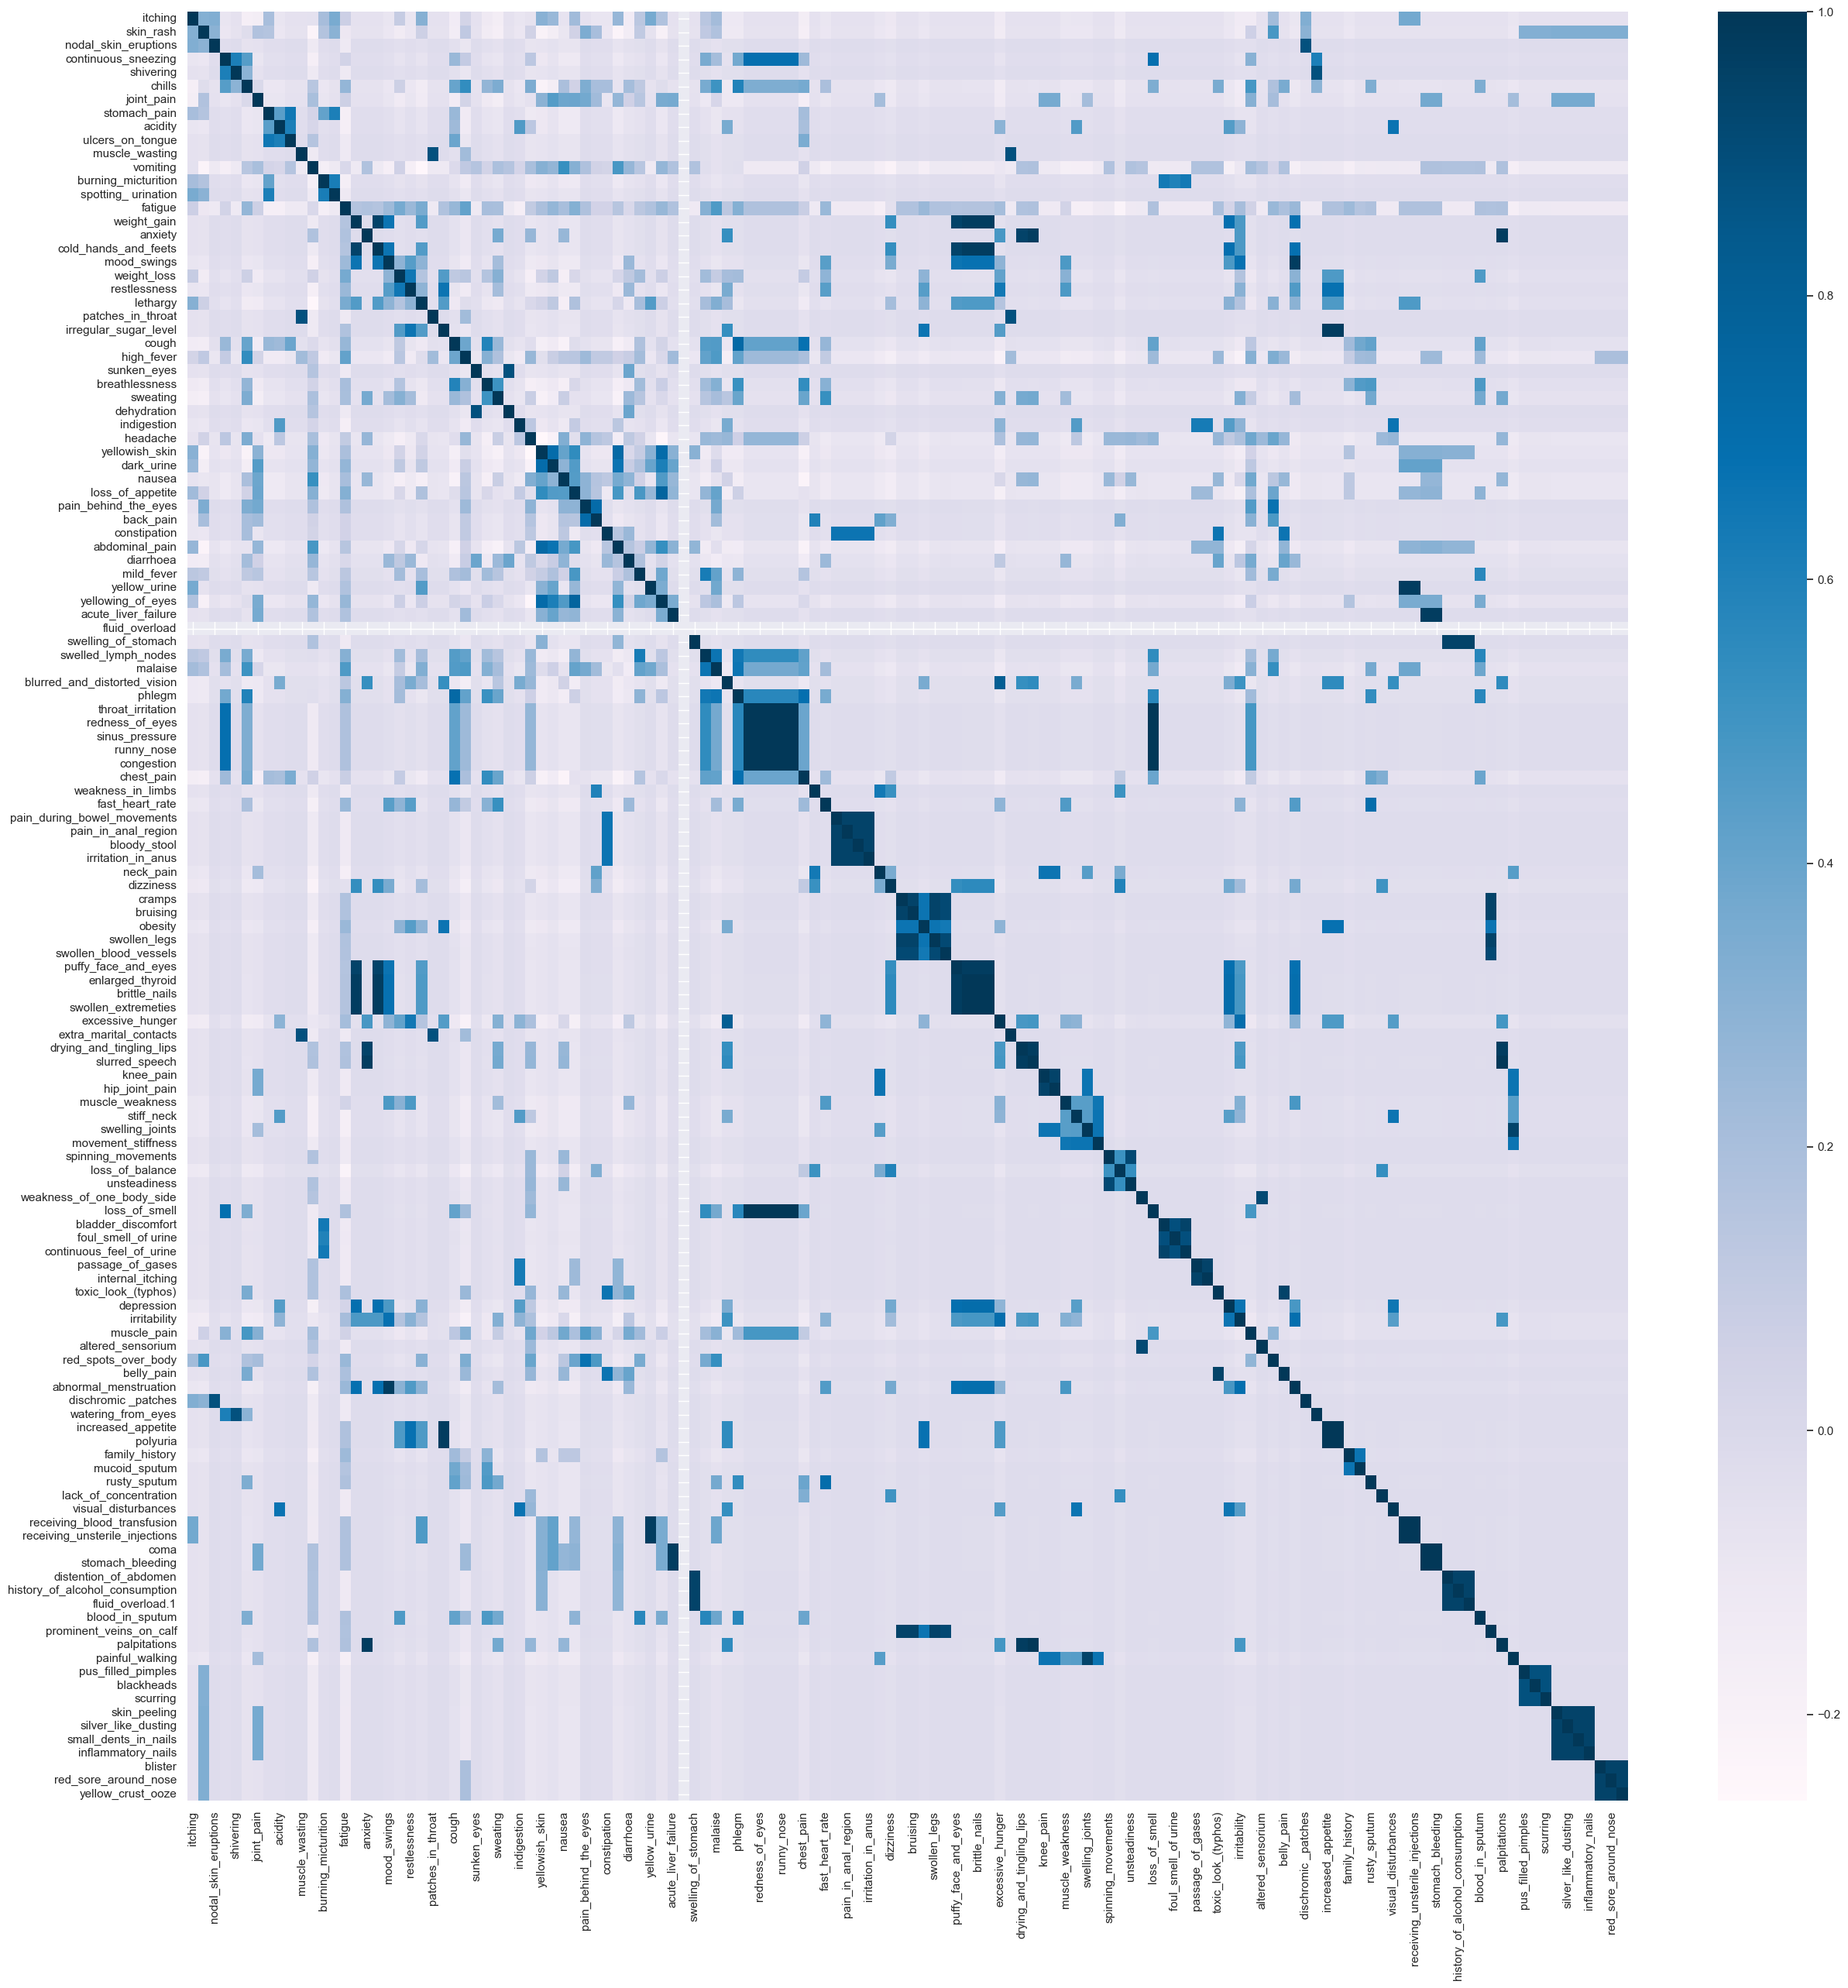

In [239]:
plt.figure(figsize = (30, 30))
sns.heatmap(train.corr(), cmap = 'PuBu', annot = False)
plt.show()

## Passo 2 - Seleção e Treinamento do Modelo

In [240]:
# Dropando colunas com correlações acima de 0.9 
corr_matrix=train.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,NaN,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,NaN,NaN,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,NaN,NaN,NaN,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,NaN,NaN,NaN,NaN,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,NaN,NaN,NaN,NaN,NaN,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023720,-0.023720,-0.023720
blister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,0.946120
red_sore_around_nose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120


In [241]:
# Encontre o índice de colunas de recursos com correlação maior que 0,9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop,len(to_drop))

train_set=train.drop(to_drop, axis=1)
test_set=test.drop(to_drop, axis=1)

['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze'] 42


In [242]:
# usando o limite de variação do sklearn para encontrar recursos constantes
temp_train=train_set.iloc[:,:-1]

from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=0.03)
sel.fit(temp_train)

VarianceThreshold(threshold=0.03)

In [243]:
# características constantes do Dataset
print(
    len([
        x for x in temp_train.columns
        if x not in temp_train.columns[sel.get_support()]
    ]))

to_drop=[x for x in temp_train.columns if x not in temp_train.columns[sel.get_support()]]
train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

41


In [244]:
encoder = LabelEncoder()
train_set["prognosis"] = encoder.fit_transform(train_set["prognosis"])
test_set["prognosis"] = encoder.transform(test_set["prognosis"])

### Início dos testes e da implementação dos Modelos

Para dar início, vamos começar com a criação de uma base de treino e outra de validação.

In [245]:
X_train, X_valid, y_train, y_valid = train_test_split(train_set.drop('prognosis', 1), train_set['prognosis'], test_size = .4, random_state=42,shuffle=True)

In [246]:
# confirmando que o Split do dataset funcionou:

X_train.shape

(2952, 49)

In [247]:
test_set = pd.concat([test_set,pd.concat([X_valid,y_valid],axis=1)],axis=0)
test_set.shape

(2010, 50)

## Regressão Logística


In [248]:
lr=LogisticRegression(C=0.2,random_state=42, penalty='l2')
lr.fit(X_train,y_train)
print("Logistic Train score with ",format(lr.score(X_train, y_train)))
print("Logistic Test score with ",format(lr.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Logistic Train score with  0.9847560975609756
Logistic Test score with  0.9835820895522388


In [249]:
y_pred = lr.predict(test_set.iloc[:,:-1])
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       1.00    

## Árvore de decisão

In [250]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Train score with ",format(dt.score(X_train, y_train)))

Decision Tree Train score with  0.9854336043360433


In [251]:
print("Decision Tree Test score with ",format(dt.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Decision Tree Test score with  0.982089552238806


In [252]:
y_pred = dt.predict(test_set.iloc[:,:-1])
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       0.89      1.00      0.94        47
           6       0.98      1.00      0.99        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.90      0.95        51
          16       1.00      1.00      1.00        51
          17       1.00    

## Random Forest

In [253]:
rf = RandomForestClassifier(max_depth=6,oob_score=True,random_state=42,criterion='entropy',max_features='auto',n_estimators=300)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_valid)
print("Random Forest Train score with ",format(rf.score(X_train, y_train)))

Random Forest Train score with  0.9773035230352304


In [254]:
perm_imp1 = PermutationImportance(rf, random_state=42,scoring='accuracy').fit(test_set.iloc[:,:-1], test_set['prognosis'])
eli5.show_weights(perm_imp1, feature_names = test_set.iloc[:,:-1].columns.tolist(),top=50)

Weight,Feature
0.1204 ± 0.0116,high_fever
0.0940 ± 0.0065,fatigue
0.0613 ± 0.0092,vomiting
0.0592 ± 0.0046,skin_rash
0.0402 ± 0.0092,joint_pain
0.0397 ± 0.0037,headache
0.0290 ± 0.0057,itching
0.0265 ± 0.0019,burning_micturition
0.0262 ± 0.0057,loss_of_appetite
0.0245 ± 0.0015,constipation


In [255]:
print("Random Forest Test score with ",format(rf.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Random Forest Test score with  0.9796019900497512


In [256]:
y_pred = rf.predict(test_set.iloc[:,:-1])
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       0.70      1.00      0.82        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       0.93    

## Naive Bayes

In [257]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred=bayes.predict(X_valid)
print("Naive Bayes Train score with ",format(bayes.score(X_train, y_train)))

Naive Bayes Train score with  0.967140921409214


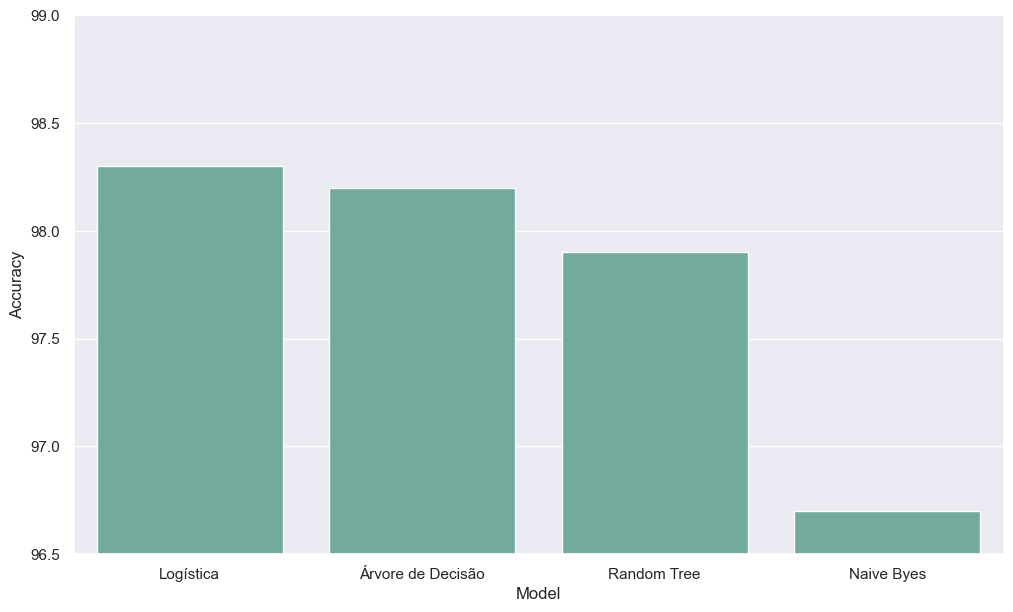

In [259]:
sns.set(style="darkgrid")

acc = pd.DataFrame({'Model':['Logística','Árvore de Decisão','Random Tree','Naive Byes'],'Accuracy':[98.3,98.2,97.9,96.7]})

# Set the figure size
fig, ax =  plt.subplots(figsize=(12, 7))
ax.set_ylim(96.5, 99)
# plot a bar chart
sns.barplot(
    x="Model", 
    y="Accuracy", 
    data=acc,  
    ci=None, 
    color='#69b3a2',
    orient = 'v');
plt.show()

## **Conclusões Finais**

Em um exame médico, os grandes indicadores de sucesso são a especificidade e a sensibilidade.

- Sensibilidade/recall – quão bom é um teste para detectar os positivos. Um teste pode trapacear e maximizar isso sempre retornando “positivo”.

- Especificidade – quão bom é um teste para evitar alarmes falsos. Um teste pode trapacear e maximizar isso sempre retornando “negativos

- Precisão – quantos classificados positivamente foram relevantes. Um teste pode trapacear e maximizar isso retornando positivo apenas em um resultado no qual está mais confiante.

- Pontuação F1 - uma boa pontuação F1 significa que você tem baixos falsos positivos e baixos falsos negativos, então você está identificando corretamente ameaças reais e não é perturbado por falsos alarmes.

Neste projeto, desenvolvemos um modelo de Machine Learning capaz de prever a presença ou ausência de doenças com base em dados clínicos. Utilizamos técnicas de exploração, pré-processamento e treinamento do modelo para alcançar resultados satisfatórios. O modelo de Regressão Logistica mostrou-se eficaz na classificação das doenças, alcançando uma acurácia de 98.3% no conjunto de validação. No entanto, é importante destacar que o projeto possui algumas limitações que podem ser aprimoradas em uma futura versão.

Pontos de Melhoria:

1. Coleta de Dados: Um ponto de melhoria seria a expansão e aprimoramento do conjunto de dados utilizados. A inclusão de mais variáveis relacionadas à saúde e informações detalhadas dos pacientes pode aumentar a precisão e capacidade de generalização do modelo.

2. Pré-processamento de Dados: É importante explorar técnicas adicionais de pré-processamento de dados para lidar com valores ausentes, outliers e desequilíbrio de classes, se aplicável. Além disso, considerar a normalização ou padronização dos dados pode melhorar o desempenho do modelo.

3. Seleção e Otimização de Modelos: Embora tenhamos utilizado o modelo de Regressão Logistica, Árvore de Decisão, Random Forest e Naive Bayes neste projeto, seria interessante explorar outros modelos e técnicas de comparção e selecionar o modelo com o melhor desempenho. Além disso, a otimização dos hiperparâmetros pode ser aprofundada para buscar configurações que maximizem o desempenho do modelo.

4. Implantação e Integração: Em uma futura versão do projeto, seria interessante considerar a implantação do modelo em um ambiente de produção, integrando-o a um sistema de informações de saúde existente. Isso permitiria a utilização prática do modelo e avaliação contínua de seu desempenho com novos dados.